### Exercise 8.12
PH 295  
Nick Ball  
**Purpose:**
Use verlet method to calculate the orbit of Earth around the sun. 

*Equations of Motions:*
$$
\frac{d^2 r}{dt^2} = -GM \frac{r}{R^3}
$$

In [1]:
#Import functions
from numpy import arange, array, sqrt
from matplotlib import pyplot as plt

a) Write a program to calculate the orbit of the Earth using the Verlet Method with a time step of h = 1hr. Make a plot of the orbit, showing several complete revolutions around the sun. The orbit should be very slightly, but visibly, non-circular.

In [41]:
#Define Constants
G = 6.6738e-11         #m^3/kg s^2
M = 1.9891e30          #kg
m = 5.9722e24          #kg

#Define Functions
def f(r):
    R = sqrt(r[0]**2 + r[1]**2)   #Make it's own variable?
    return -G*M*r/R**3

#Define variables
r = array([1.4710e11,0],float)       #starting x,y values at perihelion(m)
v = array([0,3.0287e4],float)        #starting velocity(m/s) in x,y positions

#Time interval and step size
hr = 3600
a = 0                       #s
b = 8750*hr*4               #s/orbit * how many orbits we want
h = 1*hr                    #s
tpoints = arange(a,b,h)     #MAKE SURE YOU DONT NEED IT IN SECONDS

#Verlet Method
xpoints = []
ypoints = []

#Start by calculating v at the half-step
vhalf = v + 0.5*h*f(r)

#Run through loop until we complete orbit
for t in tpoints:
    #Append x and y points
    xpoints.append(r[0])
    ypoints.append(r[1])
    r += h*vhalf
    k = h*f(r)
    v = vhalf + 0.5*k
    vhalf += k         #Why this? eq 8.78d says otherwise


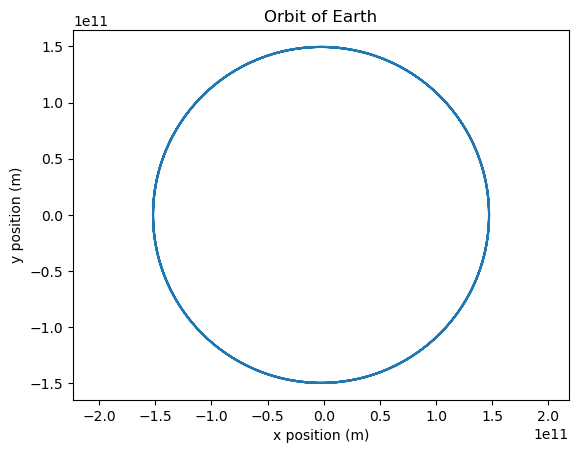

In [39]:
#Plot it
plt.figure(dpi = 100)
plt.plot(xpoints,ypoints)
plt.title("Orbit of Earth")
plt.xlabel("x position (m)")
plt.ylabel("y position (m)")
plt.axis("equal")
plt.show()

b)Modify your program to calculate both the kinetic and potential energies of Earth in it's orbit at each step, along with their sum, and share all three of these as a function of time.

In [45]:
#Define functions of Kinetic, Potential, and Total Energy
def KE(v):
    vmag = sqrt(v[0]**2 + v[1]**2)
    return 0.5*m*vmag**2   #Need to be mag?

def PE(r):
    R = sqrt(r[0]**2 + r[1]**2)
    return -G*M*m/R

#Redefine vars (reset them)
r = array([1.4710e11,0],float)       #starting x,y values at perihelion(m)
v = array([0,3.0287e4],float)        #starting velocity(m/s) in x,y positions


#Define Points
xpoints = []
ypoints = []
PEpoints = []       #potential energy
KEpoints = []       #kinetic energy
TEpoints = []       #total energy

#Verlet Method
#Start by calculating v at the half-step
vhalf = v + 0.5*h*f(r)

#Run through loop until we complete orbit
for t in tpoints:
    #Calculate current KE,PE
    Pe = PE(r)
    Ke = KE(v)
    
    #Append points
    xpoints.append(r[0]) #might not need
    ypoints.append(r[1]) #might not need
    PEpoints.append(Pe)
    KEpoints.append(Ke)
    TEpoints.append(Pe + Ke)
    
    #Do calculations
    r += h*vhalf
    k = h*f(r)
    v = vhalf + 0.5*k
    vhalf += k         #Why this? eq 8.78d says otherwise

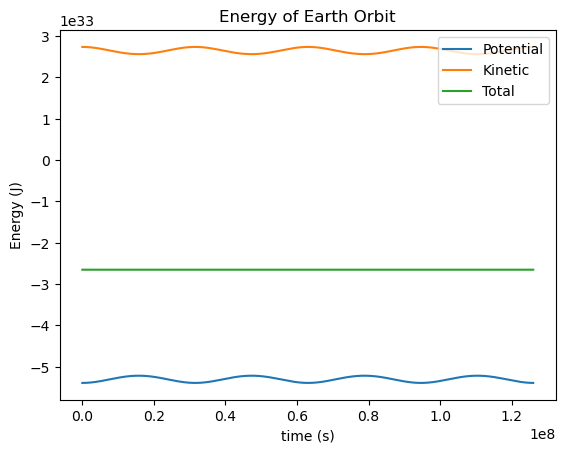

In [47]:
#Plot all energies on the same graph over the same time frame (might be redundant)
plt.figure(dpi = 100)
plt.plot(tpoints,PEpoints,label = "Potential")
plt.plot(tpoints,KEpoints,label = "Kinetic")
plt.plot(tpoints,TEpoints,label = "Total")
plt.legend(loc="upper right")
plt.title("Energy of Earth Orbit")
plt.xlabel("time (s)")
plt.ylabel("Energy (J)")
plt.show()

c) Plot the total energy by itself. Note that it's energy fluctuates a little, but always returns to the same place (conservative)

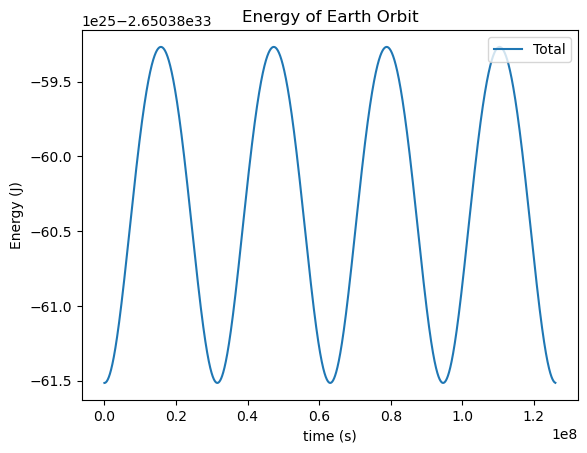

In [48]:
plt.figure(dpi = 100)
plt.plot(tpoints,TEpoints,label = "Total")
plt.legend(loc="upper right")
plt.title("Energy of Earth Orbit")
plt.xlabel("time (s)")
plt.ylabel("Energy (J)")
plt.show()

**Conclusion:**
I am curious as to why it is negative, thought the periodic nature of it is very impressive. I also wonder if there is a way to streamline and force the code into a function of sorts, if that is at all applicable. Brain rot.